# Algoritmul HillClimbing in Python
Pentru doua variabile int sau bit

In [2]:
import numpy as np
from math import sin, cos, exp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def functie_obiectiv(punct):
    """
    O funcție de maximizat cu maxime locale

    Parametri:
    punct - punctul din plan în care se calculează valoarea funcției (două coordonate)

    Returnează:
    valoare - valoarea funcției în punctul dat
    """
    x = punct[0]
    y = punct[1]
    valoare = exp(-x**2-y**2) + y*cos(5*x) - x*sin(3*y)
    return valoare

In [4]:
def calculeaza_vecini(punct_curent, nr_vecini_per_directie, distanta, interval_x, interval_y):
    """
    Calculează vecinii unui punct în plan

    Parametri:
    punct_curent - coordonatele punctului curent (două valori)
    nr_vecini_per_directie - număr de vecini pe fiecare direcție
    distanta - distanța între vecini consecutivi pe axă
    interval_x - capetele intervalului de lucru pe axa x
    interval_y - capetele intervalului de lucru pe axa y

    Returnează:
    lista_vecini - lista cu perechi de coordonate (x, y)
    lista_valori - valorile funcției în punctele vecine
    """
    # Generează coordonatele x ale vecinilor care sunt în interval
    vecini_x = [punct_curent[0] + i*distanta for i in range(-nr_vecini_per_directie, nr_vecini_per_directie+1)
              if (punct_curent[0] + i*distanta > interval_x[0]) and (punct_curent[0] + i*distanta <= interval_x[1])]

    # Generează coordonatele y ale vecinilor care sunt în interval
    vecini_y = [punct_curent[1] + i*distanta for i in range(-nr_vecini_per_directie, nr_vecini_per_directie+1)
              if (punct_curent[1] + i*distanta > interval_y[0]) and (punct_curent[1] + i*distanta <= interval_y[1])]

    # Creează toate combinațiile posibile de vecini din coordonatele x și y
    lista_vecini = [[x, y] for x in vecini_x for y in vecini_y]

    # Calculează valorile funcției pentru toți vecinii
    lista_valori = [functie_obiectiv(p) for p in lista_vecini]

    return [lista_vecini, lista_valori]

In [5]:
def deseneaza_grafic(interval_x, interval_y, coord_x, coord_y, valori_z, punct_maxim, valoare_maxima):
    """
    Vizualizează rezultatele pentru algoritmul Hill Climbing cu două variabile

    Parametri:
    interval_x - capetele intervalului de lucru pe axa x
    interval_y - capetele intervalului de lucru pe axa y
    coord_x, coord_y - listele cu coordonatele punctelor finale calculate
    valori_z - lista valorilor funcției în punctele finale
    punct_maxim - coordonatele celui mai bun punct găsit (x, y)
    valoare_maxima - valoarea maximă a funcției
    """
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Generează grid pentru suprafață
    x = np.arange(interval_x[0], interval_x[1], 0.1)
    y = np.arange(interval_y[0], interval_y[1], 0.1)
    x, y = np.meshgrid(x, y)

    # Calculează valorile funcției pentru întreaga suprafață
    z = np.exp(-x**2-y**2) + y*np.cos(5*x) - x*np.sin(3*y)

    # Desenează suprafața, punctele finale și punctul maxim
    suprafata = ax.plot_surface(x, y, z, cmap='viridis', linewidth=1, alpha=0.8, edgecolor='k')
    ax.plot3D(coord_x, coord_y, valori_z, 'bo', label='Puncte finale')
    ax.plot3D([punct_maxim[0]], [punct_maxim[1]], [valoare_maxima], 'r*', markersize=20, label='Maxim global')

    # Adaugă etichete și titlu
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X,Y)')
    ax.set_title('Vizualizare rezultate Hill Climbing pentru două variabile')
    ax.legend()

    # Adaugă bară de culori
    plt.colorbar(suprafata, ax=ax, shrink=0.5, aspect=5)

    plt.show()

Valoare maximă calculată: 3.47760769762743
E atinsă în punctul: ( -1.9407285865759003 , -1.638536012310534 )


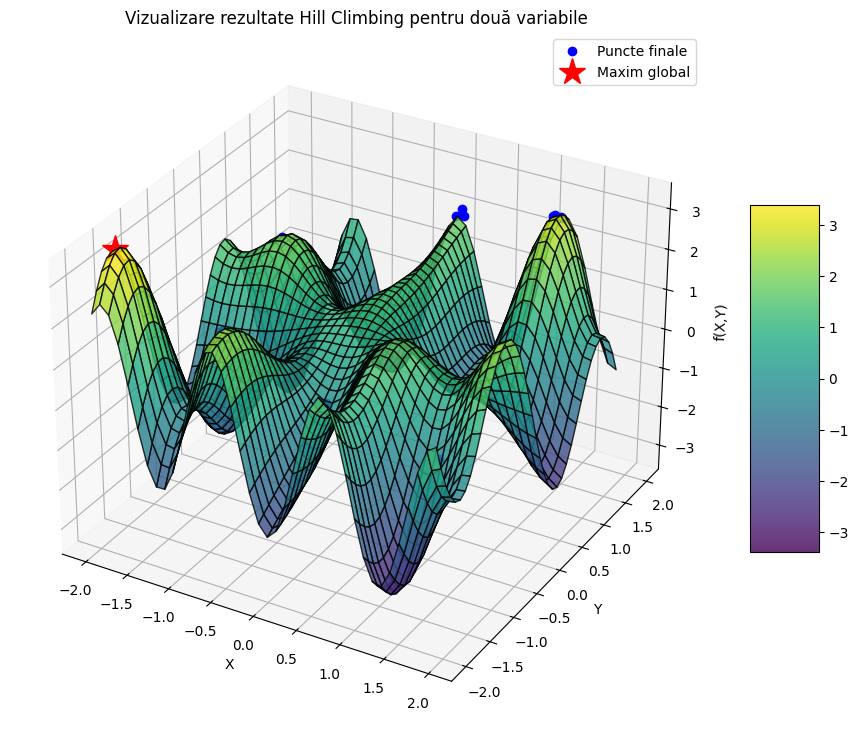

In [6]:
def hill_climbing(interval_x, interval_y, nr_puncte_initiale, nr_vecini, distanta_vecini):
    """
    Implementarea algoritmului Hill Climbing pentru găsirea maximului unei funcții de două variabile

    Parametri:
    interval_x, interval_y - intervalele pe care e definită funcția
    nr_puncte_initiale - numărul de puncte inițiale folosite de algoritm
    nr_vecini - numărul de vecini calculați pe fiecare direcție
    distanta_vecini - distanța între doi vecini consecutivi pe axă

    Returnează:
    punct_maxim - punctul de maxim (2 coordonate)
    valoare_maxima - valoarea maximă a funcției

    Exemple de apel:
    punct_maxim, valoare_maxima = hill_climbing([-2, 2], [-2, 2], 50, 2, 0.1)
    punct_maxim, valoare_maxima = hill_climbing([-2, 2], [-2, 2], 100, 10, 0.1)
    """
    # Inițializează listele pentru stocarea rezultatelor
    coord_x = [None] * nr_puncte_initiale
    coord_y = [None] * nr_puncte_initiale
    valori_z = [None] * nr_puncte_initiale
    punct_curent = [0, 0]

    # Pentru fiecare punct inițial
    for i in range(nr_puncte_initiale):
        # Generează un punct inițial aleator
        punct_curent[0] = np.random.uniform(interval_x[0], interval_x[1])
        punct_curent[1] = np.random.uniform(interval_y[0], interval_y[1])
        am_ajuns_in_maxim_local = False

        # Continuă până când găsim un maxim local
        while not am_ajuns_in_maxim_local:
            # Calculează vecinii punctului curent și valorile funcției
            vecini, valori = calculeaza_vecini(punct_curent, nr_vecini, distanta_vecini, interval_x, interval_y)

            # Găsește vecinul cu valoarea maximă
            valoare_maxima_vecin = max(valori)
            pozitie = valori.index(valoare_maxima_vecin)
            vecin_maxim = vecini[pozitie]

            # Verifică dacă am găsit un vecin mai bun
            if valoare_maxima_vecin > functie_obiectiv(punct_curent):
                punct_curent = vecin_maxim
            else:
                # Niciun vecin mai bun, am atins un maxim local
                am_ajuns_in_maxim_local = True

        # Memorează rezultatele pentru acest punct inițial
        coord_x[i] = punct_curent[0]
        coord_y[i] = punct_curent[1]
        valori_z[i] = functie_obiectiv(punct_curent)

    # Determină cel mai bun dintre toate maximele locale găsite
    valoare_maxima = max(valori_z)
    pozitie = valori_z.index(valoare_maxima)
    punct_maxim = [coord_x[pozitie], coord_y[pozitie]]

    # Afișează rezultatele și graficul
    print("Valoare maximă calculată:", valoare_maxima)
    print("E atinsă în punctul: (", punct_maxim[0], ",", punct_maxim[1], ")")
    deseneaza_grafic(interval_x, interval_y, coord_x, coord_y, valori_z, punct_maxim, valoare_maxima)

    return [punct_maxim, valoare_maxima]

# exemplu apel
pct_max, val_max = hill_climbing([-2, 2], [-2, 2], 20, 2, 0.1)